# Preprocessing

On this notebook, i will make the necessary preprocessing of the variables of interest in order to model the price based on other features.

## Packages loading and table loading

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression


In [8]:
#table loading

list_df = pd.read_csv('../raw_data/mexico/clean_listing.csv')

list_df.head(3)

id                                  name  host_id  \
0  35797                           Villa Dante   153786   
1  44616                     CONDESA HAUS  B&B   196253   
2  56074  Great space in historical San Rafael   265650   

                            host_name          neighbourhood  latitude  \
0                                Dici  Cuajimalpa de Morelos  19.38283   
1  Condesa Haus Bed & Breakfast  CDMX             Cuauhtémoc  19.41162   
2                               Maris             Cuauhtémoc  19.43977   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -99.27178  Entire home/apt   4123               1                  0   
1  -99.17794  Entire home/apt  15000               1                 50   
2  -99.15605  Entire home/apt    600               2                 66   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2021-12-19            1.45399                               1   
1  2021-08-23            0.41000                              10   
2  2021-11-21            0.50000                               2   

   availability_365  number_of_reviews_ltm  
0               363                      0  
1               344                      1  
2               364                     10

## Scaling the data

### Looking at the data distribution
Now, to understand the distribution of our data, and eventually which selecting the adequate scaler, i will plot an histogram for every numerical column.

Text(0.5, 1.0, 'num_rev_ltm')

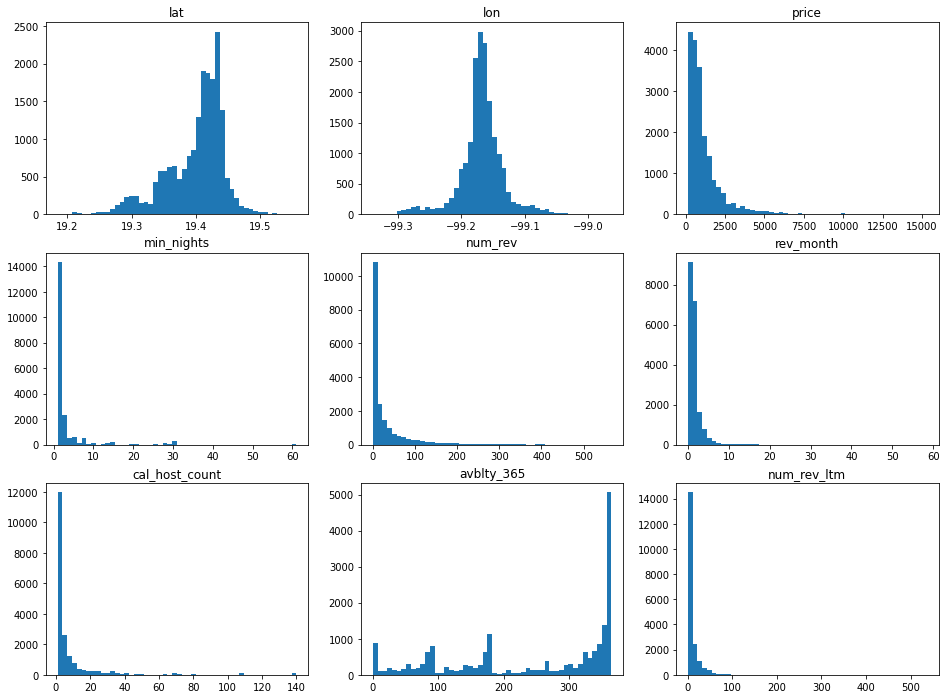

In [9]:
fig, axs = plt.subplots(3,3, figsize=(16,12))

axs[0,0].hist(list_df[['latitude']], bins=50)
axs[0,0].set_title('lat')
axs[0,1].hist(list_df[['longitude']], bins=50)
axs[0,1].set_title('lon')
axs[0,2].hist(list_df[['price']], bins=50)
axs[0,2].set_title('price')

axs[1,0].hist(list_df[['minimum_nights']], bins=50)
axs[1,0].set_title('min_nights')
axs[1,1].hist(list_df[['number_of_reviews']], bins=50)
axs[1,1].set_title('num_rev')
axs[1,2].hist(list_df[['reviews_per_month']], bins=50)
axs[1,2].set_title('rev_month')

axs[2,0].hist(list_df[['calculated_host_listings_count']], bins=50)
axs[2,0].set_title('cal_host_count')
axs[2,1].hist(list_df[['availability_365']], bins=50)
axs[2,1].set_title('avblty_365')
axs[2,2].hist(list_df[['number_of_reviews_ltm']], bins=50)
axs[2,2].set_title('num_rev_ltm')

We can see that latitude, longitude, price, number of reviews and reviews per month follow what's seems to be a normal distribution. Where variables such as min nights, availability and have a different pattern. 

This will help to determine whether a standard scalers or a min max scaler should be used. So, i will use the standard scaler for the firs group and the minmax scaler for the second one.